# 짬뽕
1. 전국 중식당 비율 (중식당이 다른 식당 (한식, 일식, 양식 등등)들에 비해 얼마나 더 있는 알아보기)
    - 현재 영업하고 있는 식당 기준
2. 전국 중식당 언제 많이 생겼고 폐업했는지
    - 언제 중식당이 많이 생겼는지 (폐업 포함) - line plot
3. 전국 현존하고 있는 중식당들은 이만큼이다 - line plot
4. 전국 중식당 분포도 (지도 시각화)
    1) 어느 지역(시, 도)에 얼마나 있는지 - barplot(비율 비교)
    2) 지도 시각화 - SVG 지도 시각화

## 일반식당 데이터 추출
### 1) 필요한 패키지 참조

In [656]:
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame, concat

import requests
from IPython.display import SVG
from bs4 import BeautifulSoup

### 2) 필요한 데이터 가져오기
- read_excel()을 통해 데이터 전체 가져오기
    - 총 7개의 sheet가 있어서 모든 sheet안의 데이터 출력을 위해 sheet_name = None 파라미터 적용
- concat()을 통해 sheet 별 데이터프레임 하나로 병합
    - 각 sheet 별 저장된 데이터들을 하나의 데이터프레임으로 병합
- .filter()을 통해 필요한 정보만 추출
- .reset_index().drop('index', axis = 'columns')을 통해 인덱스 재구성

In [13]:
data = read_excel("/Users/dayoonz/Desktop/일반음식점.xlsx", sheet_name = None)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


{'일반음식점_1':             번호 개방서비스명    개방서비스아이디  개방자치단체코드                    관리번호  \
 0            1  일반음식점  07_24_04_P   3000000  3000000-101-2018-00409   
 1            2  일반음식점  07_24_04_P   3000000  3000000-101-2018-00390   
 2            3  일반음식점  07_24_04_P   3000000  3000000-101-2019-00005   
 3            4  일반음식점  07_24_04_P   3000000  3000000-101-2018-00396   
 4            5  일반음식점  07_24_04_P   3000000  3000000-101-2018-00434   
 ...        ...    ...         ...       ...                     ...   
 299995  299996  일반음식점  07_24_04_P   3170000  3170000-101-1994-01613   
 299996  299997  일반음식점  07_24_04_P   3170000  3170000-101-1997-04608   
 299997  299998  일반음식점  07_24_04_P   3170000  3170000-101-1994-02494   
 299998  299999  일반음식점  07_24_04_P   3170000  3170000-101-1997-01410   
 299999  300000  일반음식점  07_24_04_P   3170000  3170000-101-1994-02828   
 
              인허가일자  인허가취소일자  영업상태구분코드 영업상태명  상세영업상태코드  ... 공장판매직직원수 공장생산직직원수  \
 0       2018-11-27      NaN         3    

In [419]:
일반음식점data = concat([data['일반음식점_1'], data['일반음식점_2'], 
                    data['일반음식점_3'], data['일반음식점_4'], 
                    data['일반음식점_5'], data['일반음식점_6'],
                    data['일반음식점_7']], ignore_index=True)

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장판매직직원수,공장생산직직원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
0,1,일반음식점,07_24_04_P,3000000,3000000-101-2018-00409,2018-11-27,NaN,3,폐업,2,...,0.0,0.0,NaN,0.0,0.0,N,386.84,NaN,NaN,NaN
1,2,일반음식점,07_24_04_P,3000000,3000000-101-2018-00390,2018-11-13,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,NaN,N,50.84,NaN,NaN,NaN
2,3,일반음식점,07_24_04_P,3000000,3000000-101-2019-00005,2019-01-04,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,NaN,N,7.00,NaN,NaN,NaN
3,4,일반음식점,07_24_04_P,3000000,3000000-101-2018-00396,2018-11-16,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,NaN,Y,115.70,NaN,NaN,NaN
4,5,일반음식점,07_24_04_P,3000000,3000000-101-2018-00434,2018-12-20,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,NaN,N,17.96,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079992,2079993,일반음식점,07_24_04_P,6520000,6520000-101-2019-00078,2019-02-19,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,NaN,N,45.00,NaN,NaN,NaN
2079993,2079994,일반음식점,07_24_04_P,6520000,6520000-101-2019-00077,2019-02-19,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,NaN,N,33.00,NaN,NaN,NaN
2079994,2079995,일반음식점,07_24_04_P,6520000,6520000-101-2019-00112,2019-03-08,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,NaN,N,46.55,NaN,NaN,NaN
2079995,2079996,일반음식점,07_24_04_P,6520000,6520000-101-2019-00111,2019-03-08,NaN,1,영업/정상,1,...,0.0,0.0,NaN,0.0,0.0,N,200.17,NaN,NaN,NaN


In [659]:
식당data = DataFrame(일반음식점data.filter(['업태구분명', '인허가일자', 
                                     '영업상태명', '폐업일자',
                                     '재개업일자','소재지전체주소'])).reset_index().drop('index', axis = 'columns')
식당data

,업태구분명,인허가일자,영업상태명,폐업일자,재개업일자,소재지전체주소
0,한식,2018-11-27,폐업,2022-04-12,NaN,서울특별시 종로구 신문로1가 58-12
1,경양식,2018-11-13,폐업,2019-02-22,NaN,서울특별시 종로구 누하동 195-2번지
2,기타,2019-01-04,폐업,2019-04-08,NaN,NaN
3,한식,2018-11-16,폐업,2020-01-28,NaN,서울특별시 종로구 관철동 12-2번지
4,한식,2018-12-20,폐업,2020-02-25,NaN,서울특별시 종로구 돈의동 137번지 피카디리플러스
...,...,...,...,...,...,...
2079992,한식,2019-02-19,영업/정상,NaN,NaN,"제주특별자치도 서귀포시 중문동 2128-1 A동 1,2호"
2079993,일식,2019-02-19,영업/정상,NaN,NaN,제주특별자치도 서귀포시 서귀동 326-25번지
2079994,정종/대포집/소주방,2019-03-08,영업/정상,NaN,NaN,"제주특별자치도 서귀포시 성산읍 고성리 1197-6번지 , 1층"
2079995,한식,2019-03-08,영업/정상,NaN,NaN,제주특별자치도 서귀포시 색달동 2235-3


In [595]:
식당data["업태구분명"].isnull().value_counts()
식당data["인허가일자"].isnull().value_counts()
식당data["영업상태명"].isnull().value_counts()
식당data["폐업일자"].isnull().value_counts()
식당data["재개업일자"].isnull().value_counts()
식당data["소재지전체주소"].isnull().value_counts()

식당data = 식당data.drop('재개업일자', axis = 'columns')
식당data

,인허가일자,영업상태명,폐업일자
0,2018-12-12,폐업,2023-02-28
1,2018-12-17,폐업,2020-06-01
2,2011-03-30,폐업,2021-05-25
3,2018-10-15,폐업,2023-03-23
4,2018-10-18,폐업,2020-05-06
...,...,...,...
67253,2019-02-22,영업/정상,NaN
67254,2019-02-12,영업/정상,NaN
67255,2019-01-22,영업/정상,NaN
67256,2019-01-15,영업/정상,NaN


### 3) 데이터 전처리
- .astype()을 통해 범주형 데이터의 타입을 category로 바꿈

In [596]:
식당data['인허가일자'] = 식당data['인허가일자'].astype('category')
식당data['영업상태명'] = 식당data['영업상태명'].astype('category')
식당data['폐업일자'] = 식당data['폐업일자'].astype('category')
식당data.dtypes

인허가일자    category
영업상태명    category
폐업일자     category
dtype: object

### 4) 데이터 정제
- .value_counts()를 통해 업태구분명 항목 조회
- .loc[]을 통해 같은 종류의 업태구분명 병합
- .reindex()을 통해 필요한 데이터만 추출:
    - 중식처럼 주된 식사가 아닌 간식 또는 후식 음식점들을 배제(분식, 호프/통닭,통닭(치킨), 까페, 전통찻집, 라이브카페, 키즈카페,커피숍, 다방)
    - 업태구분이 불분명한 항목들 배제 (정종/대포집/소주방, 패밀리레스토랑, 기타, 패스트푸드, 뷔패식, 식육(숯불구이), 횟집, 탕류(보신용), 감성주점,	출장조리, 이동조리, 복어취급,룸살롱, 기타 휴게음식점, 간이주점 등) 
    - >'한식', '경양식', '일식', '중국식', '외국음식전문점(인도,태국등)'만 추출

In [511]:
print(식당data['업태구분명'].value_counts())

업태구분명
한식                 958569
기타                 219574
호프/통닭              200416
분식                 177757
경양식                118651
식육(숯불구이)            67470
중국식                 67258
통닭(치킨)              55150
일식                  51031
정종/대포집/소주방          43552
횟집                  30710
까페                  22212
패스트푸드               18761
뷔페식                 10317
탕류(보신용)             10018
김밥(도시락)              9013
외국음식전문점(인도,태국등)      7575
전통찻집                 2279
라이브카페                1526
패밀리레스트랑              1505
복어취급                 1425
냉면집                  1417
출장조리                 1101
감성주점                 1001
이동조리                  904
키즈카페                  619
일반조리판매                  9
기타 휴게음식점                7
커피숍                     6
간이주점                    4
다방                      2
룸살롱                     1
식품소분업                   1
제과점영업                   1
식품등 수입판매업               1
Name: count, dtype: int64


한식 = 냉면집 = 김밥(도시락)

-> 김밥과 냉면집도 한식으로 포함하기 위해 .loc['']을 통하여 데이터 병합

In [491]:
식당data.loc[식당data['업태구분명'] == '김밥(도시락)', '업태구분명'] = '한식'
식당data.loc[식당data['업태구분명'] == '냉면집', '업태구분명'] = '한식'
식당data['업태구분명'].value_counts()

업태구분명
한식                 968999
기타                 219574
호프/통닭              200416
분식                 177757
경양식                118651
식육(숯불구이)            67470
중국식                 67258
통닭(치킨)              55150
일식                  51031
정종/대포집/소주방          43552
횟집                  30710
까페                  22212
패스트푸드               18761
뷔페식                 10317
탕류(보신용)             10018
외국음식전문점(인도,태국등)      7575
전통찻집                 2279
라이브카페                1526
패밀리레스트랑              1505
복어취급                 1425
출장조리                 1101
감성주점                 1001
이동조리                  904
키즈카페                  619
일반조리판매                  9
기타 휴게음식점                7
커피숍                     6
간이주점                    4
다방                      2
룸살롱                     1
제과점영업                   1
식품등 수입판매업               1
식품소분업                   1
냉면집                     0
김밥(도시락)                 0
Name: count, dtype: int64

#### 2.. 중식당 비율 시각화! - 파이그래프
필요한 데이터 추출
- .query()를 통해 현재 영업중인 식당들의 필요한 정보만 추출
- .reset_index().drop('index', axis = 'columns')을 통해 인덱스 재구성
- DataFrame()과 .value_counts()를 통해 원하는 업태구분명 별 count 데이터프레임 생성


In [496]:
영업식당data = 식당data.query("영업상태명 == '영업/정상'").reset_index().drop('index', axis = 'columns')

In [498]:
주식list = ['한식', '경양식', '일식', '중국식', '외국음식전문점(인도,태국등)']
주식data = DataFrame(영업식당data['업태구분명'].value_counts()).reindex(index=주식list)
주식data

,count
업태구분명,
한식,311121
경양식,33087
일식,20262
중국식,26312
"외국음식전문점(인도,태국등)",5141


그래프 전역 설정 및 그리기

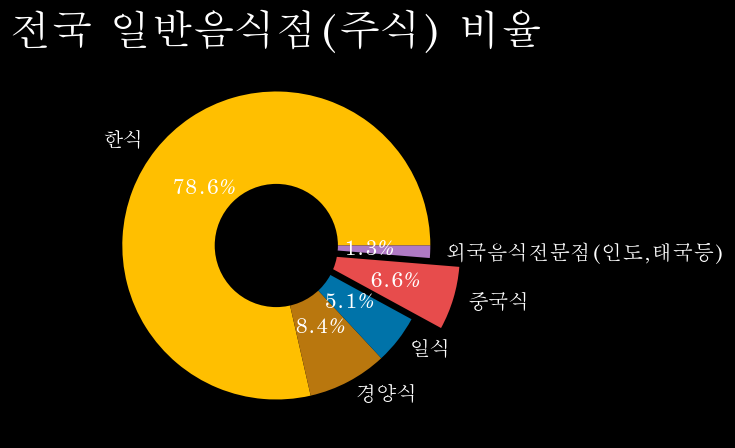

In [505]:
plt.rcParams['font.family'] = "AppleMyungjo"
plt.rcParams["font.size"] = 15
plt.rcParams["text.color"] = 'white'
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams['axes.unicode_minus'] = False

plt.title('전국 일반음식점(주식) 비율', fontsize = 30)
explode = (0, 0, 0, 0.2, 0)
colors = ['#FFBF00', '#B9770E', '#0073A9', '#E74C4C', '#AF7AC5']
주식data['count'].plot.pie(autopct = '%0.1f%%', 
                         colors = colors, 
                         explode = explode
                         ).set_ylabel('')
centre_circle = plt.Circle((0,0),0.40,fc='black')
fig = plt.gcf()
fig.set_facecolor('black')
fig.gca().add_artist(centre_circle)
plt.show()
plt.close()

#### 3.. 중국 음식점들의 유래 (전국)
- 데이터 전처리

중국식당의 data만 추출 - .query()

In [591]:
식당data = DataFrame(일반음식점data.query("업태구분명 == '중국식'").filter(['인허가일자', 
                                                                    '영업상태명', 
                                                                    '폐업일자', 
                                                                    '재개업일자'])).reset_index().drop('index', axis = 'columns')
식당data

,인허가일자,영업상태명,폐업일자,재개업일자
0,2018-12-12,폐업,2023-02-28,NaN
1,2018-12-17,폐업,2020-06-01,NaN
2,2011-03-30,폐업,2021-05-25,NaN
3,2018-10-15,폐업,2023-03-23,NaN
4,2018-10-18,폐업,2020-05-06,NaN
...,...,...,...,...
67253,2019-02-22,영업/정상,NaN,NaN
67254,2019-02-12,영업/정상,NaN,NaN
67255,2019-01-22,영업/정상,NaN,NaN
67256,2019-01-15,영업/정상,NaN,NaN


In [592]:
식당data["인허가일자"][35235] = 식당data["폐업일자"][35235]
식당data["폐업일자"][53575] = 식당data["인허가일자"][53575]
print(식당data["인허가일자"][35235])
식당data["폐업일자"][53575]

2009-02-19


/var/folders/md/0jpjv9rd2qg156cjt56sczy80000gn/T/ipykernel_73551/3518009796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  식당data["인허가일자"][35235] = 식당data["폐업일자"][35235]
/var/folders/md/0jpjv9rd2qg156cjt56sczy80000gn/T/ipykernel_73551/3518009796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  식당data["폐업일자"][53575] = 식당data["인허가일자"][53575]


'1993-05-29'

인허가일자랑 폐업일자 각각 데이터프레임으로 추출 후 병합
- DataFrame, .filter(), .value_counts(), .sort_index()
- .query('count != 0')을 통해 빈 값은 배제
- .concat 으로 병합

In [612]:
인허가data = DataFrame(식당data.filter(['인허가일자']).value_counts().sort_index())
인허가data.rename(columns = {'count':'인허가count'}, inplace = True)

폐업data = DataFrame(식당data.filter(['폐업일자']).value_counts().sort_index())
폐업data.rename(columns = {'count':'폐업count'}, inplace = True)

인폐data_pre1 = concat([인허가data, 폐업data])

print(인허가data)
print(폐업data)
print(인폐data_pre1)

            인허가count
인허가일자               
1904-08-08         2
1929-08-11         1
1954-05-08         1
1955-04-22         1
1956-11-01         1
...              ...
2023-06-23        10
2023-06-26         4
2023-06-27         8
2023-06-28         7
2023-06-29         6

[12861 rows x 1 columns]
            폐업count
폐업일자               
1983-09-09        1
1984-08-25        1
1986-06-20        1
1986-12-01        1
1987-03-21        1
...             ...
2023-06-23        8
2023-06-26        8
2023-06-27       14
2023-06-28        4
2023-06-29        5

[7738 rows x 1 columns]
            인허가count  폐업count
1904-08-08       2.0      NaN
1929-08-11       1.0      NaN
1954-05-08       1.0      NaN
1955-04-22       1.0      NaN
1956-11-01       1.0      NaN
...              ...      ...
2023-06-23       NaN      8.0
2023-06-26       NaN      8.0
2023-06-27       NaN     14.0
2023-06-28       NaN      4.0
2023-06-29       NaN      5.0

[20599 rows x 2 columns]


결측치 정제 - 0 으로 대체 
 - .fillna()

In [613]:
인폐data = DataFrame(인폐data_pre1.fillna(value = 0).reset_index())
인폐data.rename(columns = {'level_0':'날짜'}, inplace = True)
인폐data

,날짜,인허가count,폐업count
0,1904-08-08,2.0,0.0
1,1929-08-11,1.0,0.0
2,1954-05-08,1.0,0.0
3,1955-04-22,1.0,0.0
4,1956-11-01,1.0,0.0
...,...,...,...
20594,2023-06-23,0.0,8.0
20595,2023-06-26,0.0,8.0
20596,2023-06-27,0.0,14.0
20597,2023-06-28,0.0,4.0


10년 단위 데이터 프레임 생성

In [615]:
인허가count1900_1909 = []
인허가count1910_1919 = []
인허가count1920_1929 = []
인허가count1930_1939 = []
인허가count1940_1949 = []
인허가count1950_1959 = []
인허가count1960_1969 = []
인허가count1970_1979 = []
인허가count1980_1989 = []
인허가count1990_1999 = []
인허가count2000_2009 = []
인허가count2010_2019 = []
인허가count2020_2029 = []

폐업count1900_1909 = []
폐업count1910_1919 = []
폐업count1920_1929 = []
폐업count1930_1939 = []
폐업count1940_1949 = []
폐업count1950_1959 = []
폐업count1960_1969 = []
폐업count1970_1979 = []
폐업count1980_1989 = []
폐업count1990_1999 = []
폐업count2000_2009 = []
폐업count2010_2019 = []
폐업count2020_2029 = []

for a in range(len(인폐data['날짜'])):
    if '1900-01-01' <= 인폐data['날짜'][a] <= '1909-12-31':
        인허가count1900_1909.append(인폐data['인허가count'][a])
        폐업count1900_1909.append(인폐data['폐업count'][a])
    elif '1910-01-01' <= 인폐data['날짜'][a] <= '1919-12-31':
        인허가count1910_1919.append(인폐data['인허가count'][a])
        폐업count1910_1919.append(인폐data['폐업count'][a])
    elif '1920-01-01' <= 인폐data['날짜'][a] <= '1929-12-31':
        인허가count1920_1929.append(인폐data['인허가count'][a])
        폐업count1920_1929.append(인폐data['폐업count'][a])
    elif '1930-01-01' <= 인폐data['날짜'][a] <= '1939-12-31':
        인허가count1930_1939.append(인폐data['인허가count'][a])
        폐업count1930_1939.append(인폐data['폐업count'][a])
    elif '1940-01-01' <= 인폐data['날짜'][a] <= '1949-12-31':
        인허가count1940_1949.append(인폐data['인허가count'][a])
        폐업count1940_1949.append(인폐data['폐업count'][a])
    elif '1950-01-01' <= 인폐data['날짜'][a] <= '1959-12-31':
        인허가count1950_1959.append(인폐data['인허가count'][a])
        폐업count1950_1959.append(인폐data['폐업count'][a])
    elif '1960-01-01' <= 인폐data['날짜'][a] <= '1969-12-31':
        인허가count1960_1969.append(인폐data['인허가count'][a])
        폐업count1960_1969.append(인폐data['폐업count'][a])
    elif '1970-01-01' <= 인폐data['날짜'][a] <= '1979-12-31':
        인허가count1970_1979.append(인폐data['인허가count'][a])
        폐업count1970_1979.append(인폐data['폐업count'][a])
    elif '1980-01-01' <= 인폐data['날짜'][a] <= '1989-12-31':
        인허가count1980_1989.append(인폐data['인허가count'][a])
        폐업count1980_1989.append(인폐data['폐업count'][a])
    elif '1990-01-01' <= 인폐data['날짜'][a] <= '1999-12-31':
        인허가count1990_1999.append(인폐data['인허가count'][a])
        폐업count1990_1999.append(인폐data['폐업count'][a])
    elif '2000-01-01' <= 인폐data['날짜'][a] <= '2009-12-31':
        인허가count2000_2009.append(인폐data['인허가count'][a])
        폐업count2000_2009.append(인폐data['폐업count'][a])
    elif '2010-01-01' <= 인폐data['날짜'][a] <= '2019-12-31':
        인허가count2010_2019.append(인폐data['인허가count'][a])
        폐업count2010_2019.append(인폐data['폐업count'][a])
    else:
        인허가count2020_2029.append(인폐data['인허가count'][a])
        폐업count2020_2029.append(인폐data['폐업count'][a])

인허가count10 = []
인허가datecount = [인허가count1900_1909,
            인허가count1910_1919,
            인허가count1920_1929,
            인허가count1930_1939,
            인허가count1940_1949,
            인허가count1950_1959,
            인허가count1960_1969,
            인허가count1970_1979,
            인허가count1980_1989,
            인허가count1990_1999,
            인허가count2000_2009,
            인허가count2010_2019,
            인허가count2020_2029
]
for a in range(len(인허가datecount)):
    인허가count10.append(sum(인허가datecount[a]))

폐업count10 = []
폐업datecount = [폐업count1900_1909,
            폐업count1910_1919,
            폐업count1920_1929,
            폐업count1930_1939,
            폐업count1940_1949,
            폐업count1950_1959,
            폐업count1960_1969,
            폐업count1970_1979,
            폐업count1980_1989,
            폐업count1990_1999,
            폐업count2000_2009,
            폐업count2010_2019,
            폐업count2020_2029
]
for a in range(len(폐업datecount)):
    폐업count10.append(sum(폐업datecount[a]))

중식당수list = []
중식당수value = 0
for a in range(len(인허가datecount)):
    중식당수value += 인허가count10[a] - 폐업count10[a]
    중식당수list.append(중식당수value)

날짜별 = ['1900-1909',
'1910-1919',
'1920-1929',
'1930-1939',
'1940-1949',
'1950-1959',
'1960-1969',
'1970-1979',
'1980-1989',
'1990-1999',
'2000-2009',
'2010-2019',
'2020-2029']

중식당10data = DataFrame([])
중식당10data['날짜별'] = 날짜별
중식당10data['인허가count10'] = 인허가count10
중식당10data['폐업count10'] = 폐업count10
중식당10data['중식당수list'] = 중식당수list

중식당10_data = 중식당10data.set_index('날짜별')
중식당10_data.rename(columns = {'중식당수list':'중식당수'}, inplace = True)
중식당10_data

,인허가count10,폐업count10,중식당수
날짜별,,,
1900-1909,2.0,0.0,2.0
1910-1919,0.0,0.0,2.0
1920-1929,1.0,0.0,3.0
1930-1939,0.0,0.0,3.0
1940-1949,0.0,0.0,3.0
1950-1959,5.0,0.0,8.0
1960-1969,204.0,0.0,212.0
1970-1979,1546.0,0.0,1758.0
1980-1989,6156.0,75.0,7839.0


시각화


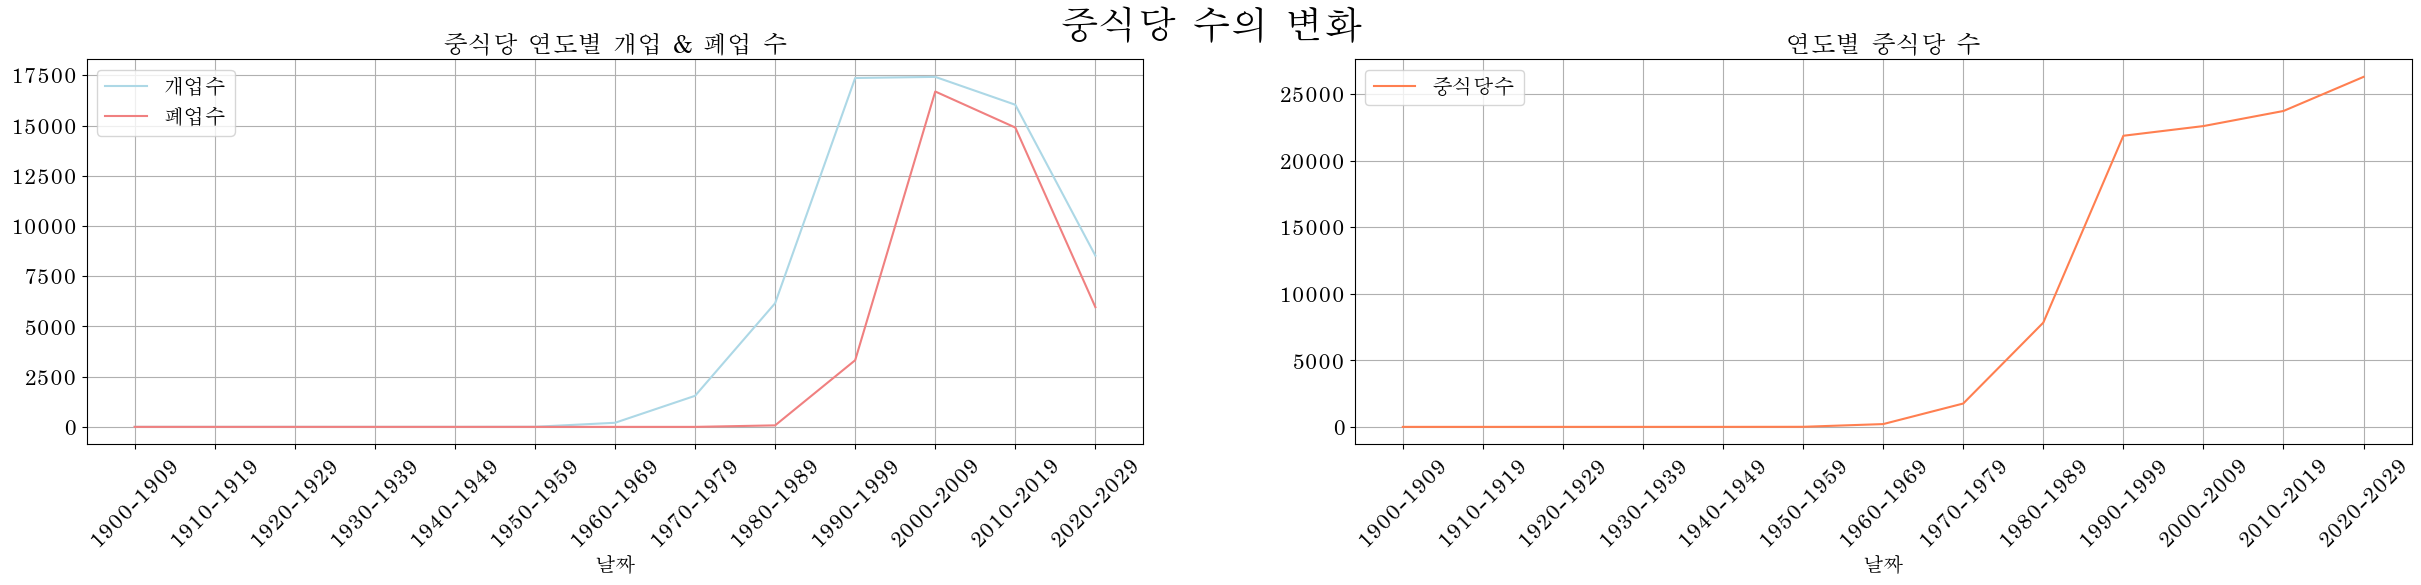

In [621]:
plt.rcParams['font.family'] = "AppleMyungjo"  
plt.rcParams["font.size"] = 15
plt.rcParams["text.color"] = 'black'
plt.rcParams["figure.figsize"] = (30, 5)
plt.rcParams['axes.unicode_minus'] = False

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('중식당 수의 변화', fontsize = 28)
fig.subplots_adjust(wspace = 0.2, hspace = 0.2)

중식당10_data.filter(['인허가count10', '폐업count10']).plot(ax = ax1, rot =45, color = ['lightblue', 'lightcoral'])
ax1.title.set_text('중식당 연도별 개업 & 폐업 수')
ax1.set_xticks(list(range(len(날짜별))), 날짜별)
ax1.set(xlabel='날짜')
ax1.grid()
ax1.legend(['개업수', '폐업수'])

중식당10_data.filter(['중식당수']).plot(ax = ax2, rot =45, color = 'coral')
ax2.set_title('연도별 중식당 수')
ax2.set_xticks(list(range(len(날짜별))), 날짜별)
ax2.set(xlabel='날짜')
ax2.grid()
ax2.legend()

plt.show()
plt.close()


In [660]:
식당data = DataFrame(일반음식점data.query("업태구분명 == '중국식'" and
                                    "영업상태명 == '영업/정상'").filter(['소재지전체주소'])).reset_index().drop('index',
                                                                                                         axis = 'columns')
식당data

,소재지전체주소
0,서울특별시 종로구 도렴동 60 도렴빌딩
1,서울특별시 종로구 수송동 58 지하118호
2,서울특별시 종로구 중학동 19 더케이트윈타워 지하1층
3,서울특별시 종로구 삼청동 21-3 1층
4,서울특별시 종로구 명륜4가 111-2 1층
...,...
695810,"제주특별자치도 서귀포시 중문동 2128-1 A동 1,2호"
695811,제주특별자치도 서귀포시 서귀동 326-25번지
695812,"제주특별자치도 서귀포시 성산읍 고성리 1197-6번지 , 1층"
695813,제주특별자치도 서귀포시 색달동 2235-3


현존하고 있는 중식당들의 지도시각화

In [661]:
중식당위치data = 식당data.dropna()
print(중식당위치data)
print("빈값수: ", len(식당data) - len(중식당위치data))

                                    소재지전체주소
0                    서울특별시 종로구 도렴동 60 도렴빌딩 
1                   서울특별시 종로구 수송동 58 지하118호
2            서울특별시 종로구 중학동 19 더케이트윈타워 지하1층 
3                    서울특별시 종로구 삼청동 21-3 1층 
4                  서울특별시 종로구 명륜4가 111-2 1층 
...                                     ...
695810      제주특별자치도 서귀포시 중문동 2128-1 A동 1,2호
695811           제주특별자치도 서귀포시 서귀동 326-25번지 
695812  제주특별자치도 서귀포시 성산읍 고성리 1197-6번지 , 1층 
695813             제주특별자치도 서귀포시 색달동 2235-3 
695814              제주특별자치도 서귀포시 서귀동 271-1 

[694348 rows x 1 columns]
빈값수:  1467


데이터전처리: 데이터 타입 변환

In [662]:
식당data['소재지전체주소'] = 식당data['소재지전체주소'].astype('category')
식당data.dtypes

소재지전체주소    category
dtype: object

데이터 정제 및 재배치: 시도명 컬럼 생성 및 추가

In [668]:
addr_split = 중식당위치data['소재지전체주소'].str.split(' ')
중식당위치data['시도명'] = addr_split.str.get(0)
중식당위치data

/var/folders/md/0jpjv9rd2qg156cjt56sczy80000gn/T/ipykernel_73551/1018734207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  중식당위치data['시도명'] = addr_split.str.get(0)


,소재지전체주소,시도명
0,서울특별시 종로구 도렴동 60 도렴빌딩,서울특별시
1,서울특별시 종로구 수송동 58 지하118호,서울특별시
2,서울특별시 종로구 중학동 19 더케이트윈타워 지하1층,서울특별시
3,서울특별시 종로구 삼청동 21-3 1층,서울특별시
4,서울특별시 종로구 명륜4가 111-2 1층,서울특별시
...,...,...
695810,"제주특별자치도 서귀포시 중문동 2128-1 A동 1,2호",제주특별자치도
695811,제주특별자치도 서귀포시 서귀동 326-25번지,제주특별자치도
695812,"제주특별자치도 서귀포시 성산읍 고성리 1197-6번지 , 1층",제주특별자치도
695813,제주특별자치도 서귀포시 색달동 2235-3,제주특별자치도


시도명 데이터분포 확인

In [665]:
중식당위치data['시도명'].value_counts()

시도명
경기도            148410
서울특별시          125176
경상남도            50529
부산광역시           44492
경상북도            43108
인천광역시           33007
충청남도            32998
강원특별자치도         31504
대구광역시           30914
전라남도            29237
전라북도            25885
충청북도            25771
대전광역시           19824
광주광역시           18363
울산광역시           15616
제주특별자치도         15604
세종특별자치시          3902
1,2층                2
21B                 1
0                   1
1.2층                1
한일유앤아이아파트상가         1
-1번지                1
-104                1
Name: count, dtype: int64

데이터 정제
- 이상치 제거
- 데이터 이름 변경 (강원특별자치도 -> 강원도)

In [674]:
print(중식당위치data.query('시도명 == "강원특별자치도"'))
print(중식당위치data.query('시도명 == "1,2층"'))
print(중식당위치data.query('시도명 == "21B"'))
print(중식당위치data.query('시도명 == "0"'))
print(중식당위치data.query('시도명 == "-104"'))
print(중식당위치data.query('시도명 == "1.2층"'))
print(중식당위치data.query('시도명 == "한일유앤아이아파트상가"'))
print(중식당위치data.query('시도명 == "-1번지"'))
print(중식당위치data.query('시도명 == "-104"'))

                            소재지전체주소      시도명
413487    강원특별자치도 춘천시 남면 추곡리 165-1   강원특별자치도
413488      강원특별자치도 춘천시 후평동 684-14   강원특별자치도
413489   강원특별자치도 춘천시 동내면 거두리 617-7   강원특별자치도
413490         강원특별자치도 춘천시 교동 55-8   강원특별자치도
413491       강원특별자치도 춘천시 석사동 832-3   강원특별자치도
...                             ...      ...
445037    강원특별자치도 양양군 현남면 지경리 9-10   강원특별자치도
445038  강원특별자치도 양양군 손양면 하왕도리 207-1   강원특별자치도
445039  강원특별자치도 양양군 손양면 하왕도리 207-1   강원특별자치도
445040    강원특별자치도 양양군 강현면 용호리 4-13   강원특별자치도
445041     강원특별자치도 양양군 강현면 전진리 9-1   강원특별자치도

[31504 rows x 2 columns]
       소재지전체주소   시도명
280547   1,2층   1,2층
280635   1,2층   1,2층
           소재지전체주소  시도명
285489  21B 3-2L동   21B
                 소재지전체주소 시도명
283959  0 진장명촌지구 91B-4L    0
       소재지전체주소   시도명
638905   -104   -104
       소재지전체주소   시도명
605705   1.2층   1.2층
                   소재지전체주소          시도명
614282  한일유앤아이아파트상가 101-1호  한일유앤아이아파트상가
       소재지전체주소   시도명
616640   -1번지   -1번지
       소재지전체주소   시도명
638905   -104   -104


In [679]:
중식당위치data.loc[중식당위치data['시도명'] == '강원특별자치도', '시도명'] = '강원도'
중식당위치data = 중식당위치data.drop([280547, 280635, 285489,
                          283959, 638905, 605705,
                          614282, 616640, 638905])

중식당위치data['시도명'].value_counts()

시도명
경기도        148410
서울특별시      125176
경상남도        50529
부산광역시       44492
경상북도        43108
인천광역시       33007
충청남도        32998
강원도         31504
대구광역시       30914
전라남도        29237
전라북도        25885
충청북도        25771
대전광역시       19824
광주광역시       18363
울산광역시       15616
제주특별자치도     15604
세종특별자치시      3902
Name: count, dtype: int64

데이터프레임 생성

In [681]:
집계data = 중식당위치data.groupby(['시도명'], as_index = False).count().rename(columns={'소재지전체주소': '중식당수'}).set_index('시도명')
집계data

,중식당수
시도명,
강원도,31504
경기도,148410
경상남도,50529
경상북도,43108
광주광역시,18363
대구광역시,30914
대전광역시,19824
부산광역시,44492
서울특별시,125176


barplot 비교


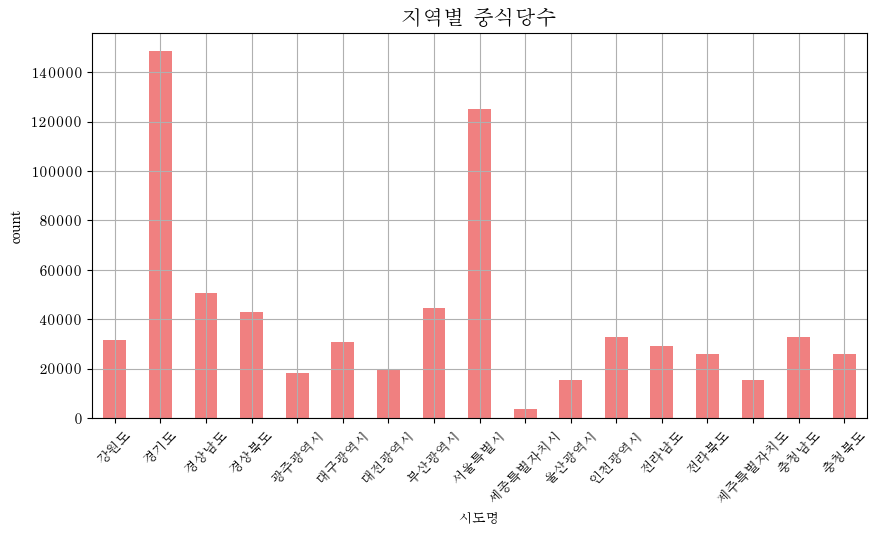

In [688]:
plt.rcParams['font.family'] = "AppleMyungjo"
plt.rcParams["font.size"] = 10
plt.rcParams["text.color"] = 'black'
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams['axes.unicode_minus'] = False

집계data['중식당수'].plot.bar(color = 'lightcoral', ylabel = 'count', rot = 45)
plt.title('지역별 중식당수', size = 15)
plt.grid()
plt.show()
plt.close()

기술 통계 수행 및 설명

In [690]:
desc = 집계data.describe()
desc

,중식당수
count,17.000000
mean,40843.529412
std,38139.979315
min,3902.000000
25%,19824.000000
50%,30914.000000
75%,43108.000000
max,148410.000000


기술 통계량 시각화 및 설명

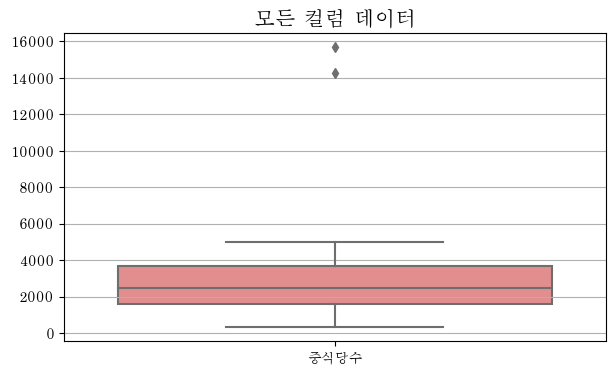

In [451]:
plt.rcParams["font.family"] = 'AppleMyungjo'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

plt.figure()
plt.title('모든 컬럼 데이터', size = 15)
plt.grid()
sb.boxplot(data=집계결과df, color = 'lightcoral')
plt.show()
plt.close()

도수분포 조회 및 분포도 생성

In [452]:
hist, bins = np.histogram(집계결과df['중식당수'], bins = 5)
print(hist)
print(bins)

info = []
for i, v in enumerate(hist):
    if i+1 < len(hist):
        tpl = '%d이상 %d미만'
    else:
        tpl = '%d이상 %d이하'
    
    cls = tpl % (bins[i], bins[i+1])
    line = {'계급': cls, '도수': v}
    info.append(line)

hist_df = DataFrame(info)
hist_df.set_index('계급', inplace = True)
hist_df

[12  3  0  0  2]
[  314.   3385.2  6456.4  9527.6 12598.8 15670. ]


,도수
계급,
314이상 3385미만,12
3385이상 6456미만,3
6456이상 9527미만,0
9527이상 12598미만,0
12598이상 15670이하,2


데이터 시각화

지도 파일 가져오기

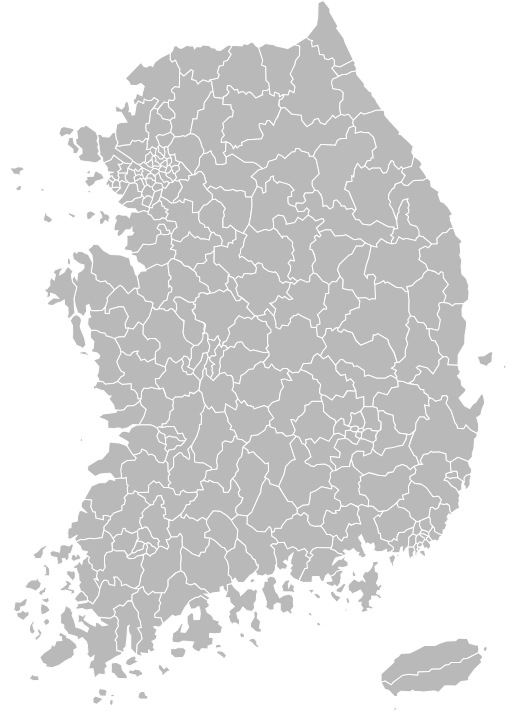

In [454]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"
header_info = {'User-agent': user_agent, 'referer': None}

r = requests.get('https://data.hossam.kr/D04/map_korea.svg', headers = header_info)

if r.status_code != 200:
    err_msg = '%d %s에러가 발생했습니다.' % (r.status_code, r.reason)
    raise Exception(err_msg)

map_svg = r.text
SVG(map_svg)

단계별 색상값 준비 및 SVG에서 시, 도 단위로 추출

In [455]:
colors = ['#FFE9EF', '#FFC7D5', '#FF9EB7', '#FF678F', '#FF0043']

soup = BeautifulSoup(map_svg)
sido = soup.select('g[id]')
sido

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


[<g id="서울특별시">
 <path d="M171.5,167.272v2.167l1.167,1.25l-0.25,1.083l1.083,1.75l1.917,0.583
 		l0.333-1.5l3.833-2.833l-0.333-2.5l-0.833-1.667l-3.667-0.333L171.5,167.272" fill="#B9B9B9" id="강동구" stroke="#FFFFFF"></path>
 <path d="M171.5,169.439l-2.25,3.25l-3.333,0.417v2.5l2.833,2.25l1-0.083l0.667,1
 		l1.167,0.917l1.25,2.5l3.75-4.583l-1.167-3v-0.5l-1.917-0.583l-0.917-1.917l0.083-0.917L171.5,169.439z" fill="#B9B9B9" id="송파구" stroke="#FFFFFF"></path>
 <path d="M168.583,165.605l-1.5,0.25l-0.583,1.75l-1.25,3l-0.583,1.917l1.25,0.583
 		l3.333-0.417l2.25-3.25l-0.083-1.917l-1.833-3.083L168.583,165.605z" fill="#B9B9B9" id="광진구" stroke="#FFFFFF"></path>
 <path d="M166.667,158.939l0.417,6.917l1.5-0.25l3-2.917l-0.167-3.917L171,157.855
 		l-2.583,0.083L166.667,158.939z" fill="#B9B9B9" id="중랑구" stroke="#FFFFFF"></path>
 <path d="M164.917,146.605l-0.833,2.833l0.667,2.417l-0.5,3.75l-1.083,0.417
 		l1.75,2.083l1.917,1l1.583-1.167l3,0.333l-3-5.333l-0.5-6L164.917,146.605" fill="#B9B9B9" id="노원구" stroke=

지도상의 시, 도 단위로 반복

In [456]:
for item in sido:
    지역명 = item['id']

    # 지도상의 지역명이 데이터프레임에 없다면 무시한다
    if 지역명 not in 집계결과df.index:
        continue

    # 지역명에 해당하는 데이터를 추출한다
    count = 집계결과df.loc[지역명, '중식당수']
    print(지역명, '-->', count)

    # 학교 수에 따라 단계값 설정 (단계는 색생값의 수에 따름)
    if 15670 >= count >= 12598.8: color_index = 4
    elif 12598.8 > count >= 9527 : color_index = 3
    elif 9527 > count >= 6456.4: color_index = 2
    elif 6456.4 > count >= 3385.2: color_index = 1
    else: color_index = 0

    # 시, 도 안에서 구, 군을 추출하여 반복
    for p in item.select('path'):
        if 'fill' in p.attrs:
            p['fill'] = colors[color_index]

서울특별시 --> 15670
인천광역시 --> 3321
경기도 --> 14272
강원도 --> 2457
충청북도 --> 2192
대전광역시 --> 1537
충청남도 --> 2744
제주특별자치도 --> 704
경상북도 --> 3695
대구광역시 --> 3274
울산광역시 --> 1588
경상남도 --> 4200
부산광역시 --> 5013
전라북도 --> 2469
광주광역시 --> 1540
전라남도 --> 2187
세종특별자치시 --> 314


SVG 이미지를 파일로 저장

In [457]:
with open('result.svg', 'w', encoding = 'utf-8') as f:
    f.write(soup.prettify())

____________________________